# 一般线性模型

$$ y = \beta_0 + \beta_1 z_1 + \beta_2 z_2 + \cdots + \beta_p z_p + \varepsilon$$

## 模拟曲线关系

$$ y = \beta_0 + \beta_1 x_1 + \varepsilon$$

In [8]:
import pandas as pd
import seaborn as sb
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

reynolds = pd.read_csv('ch16/Reynolds.csv')
reynolds

,Months,Sales
0,41,275
1,106,296
2,76,317
3,104,376
4,22,162
5,12,150
6,85,367
7,111,308
8,40,189
9,51,235


In [7]:
rp.summary_cont(reynolds[['Months', 'Sales']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Months,15.0,50.0000,37.9304,9.7936,28.9949,71.0051
1,Sales,15.0,230.0667,102.0003,26.3364,173.5808,286.5526


<AxesSubplot:xlabel='Months', ylabel='Sales'>

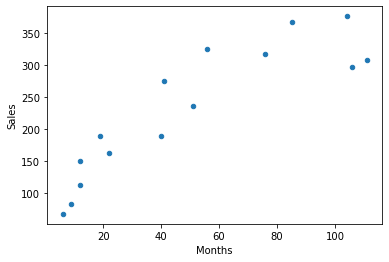

In [2]:
reynolds.plot(x = 'Months', y = 'Sales', kind = 'scatter')

In [52]:
model = smf.ols("Sales ~ Months", reynolds).fit()
model.summary()

/Users/stephenyan/miniconda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.24e-05
Time:                        13:23:06   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.2279     21.628      5.143      0.000      64.503     157.952
Months         2.3768      0.349      6.812      0.000       1.623       3.131
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.723
Skew:                           0.052   Prob(JB):                        0.697
Kurtosis:                       1.930   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

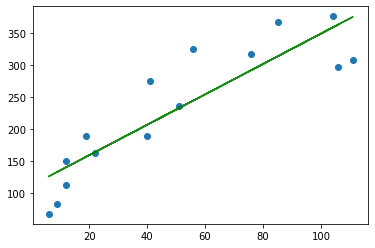

In [66]:
plt.scatter(reynolds.Months,reynolds.Sales)
plt.plot(reynolds.Months, model.predict(reynolds), 'g-', label='Poly n=2 $R^2$=%.2f' % model.rsquared,alpha=0.9)

上图估计的回归直线方程是：

$$Sales = 111.2 + 2.377 Months$$

尽管普通线性回归计算出来 $R^2$ 的结果是 0.781，已经是显著的线性相关了，而且线性关系解释了销售数量中大部分变异性，然而标准化的残差图其它我们，仍然需要一个曲线关系。

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \varepsilon$$

In [69]:
model2 = smf.ols(formula = 'Sales ~ Months + I(Months**2)', data = reynolds).fit()
model2.summary()
#plt.scatter(reynolds.Months,reynolds.Sales)
#plt.plot(reynolds.Months, model2.predict(reynolds), 'g-', label='Poly n=2 $R^2$=%.2f' % model.rsquared, alpha=0.9)

/Users/stephenyan/miniconda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           8.75e-07
Time:                        13:44:28   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         45.3476     22.775      1.991      0.070      -4.274      94.969
Months             6.3448      1.058      5.998      0.000       4.040       8.650
I(Months ** 2)    -0.0345      0.009     -3.854      0.002      -0.054      -0.015
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.003
Skew:                          -0.126   Prob(JB):                        0.606
Kurtosis:                       1.758   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='Months', ylabel='Sales'>

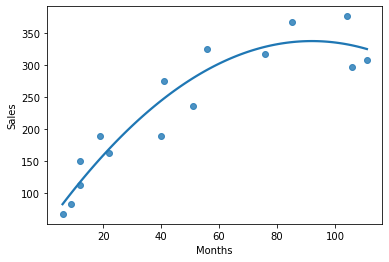

In [70]:
sb.regplot(x='Months', y='Sales', order=2, ci = None, data = reynolds)

此时，估计的回归方程是：
$$Sales = 45.3 + 6.34 Months - 0.0344 Month^2$$

而且 $R^2(adj.) = 0.886$

## 交互作用

如果原始数据集由应变量 $y$ 和两个自变量 $x_1$、$x_2$ 的观测值组成，我们可以建立一个含有两个预测变量的二阶模型：

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2 + \varepsilon$$

为了说明两个变量共同作用产生的潜在影响，增加了一个变量 $x_1 x_2$，这种类型的影响被称为交互作用。

In [79]:
tyler = pd.read_csv('ch16/Tyler.csv')
tyler = tyler.rename(columns={"Advertising\nExpenditure\n($1000s)":"Advertising"})
tyler = tyler.rename(columns={"Sales\n(1000s)":"Sales"})
tyler.head()

,Price,Advertising,Sales
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358


In [80]:
rp.summary_cont(tyler[['Advertising', 'Sales']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Advertising,24.0,75.0000,25.5377,5.2129,64.2164,85.7836
1,Sales,24.0,497.6667,177.5671,36.2457,422.6867,572.6467


In [64]:
rp.summary_cont(tyler.groupby(["Price"])["Advertising"])

,N,Mean,SD,SE,95% Conf.,Interval
Price,,,,,,
2.0,8,75.0,26.7261,9.4491,52.6564,97.3436
2.5,8,75.0,26.7261,9.4491,52.6564,97.3436
3.0,8,75.0,26.7261,9.4491,52.6564,97.3436


In [81]:
rp.summary_cont(tyler.groupby(["Price"])["Sales"])

,N,Mean,SD,SE,95% Conf.,Interval
Price,,,,,,
2.0,8,634.5,186.2487,65.8489,478.7922,790.2078
2.5,8,505.0,151.4256,53.5370,378.4050,631.5950
3.0,8,353.5,27.7077,9.7961,330.3358,376.6642


In [91]:
# 无交互作用的模型
model = smf.ols(formula = 'Sales ~ Advertising + C(Price)', data = tyler).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     38.25
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.79e-08
Time:                        14:31:31   Log-Likelihood:                -134.96
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      20   BIC:                             282.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         298.5000     51.876      5.754      0.000     190.288     406.712
C(Price)[T.2.5]  -129.5000     36.682     -3.530      0.002    -206.017     -52.983
C(Price)[T.3.0]  -281.0000     36.682     -7.660      0.000    -357.517    -204.483
Advertising         4.4800      0.599      7.479      0.000       3.230       5.730
==============================================================================
Omnibus:                        6.165   Durbin-Watson:                   2.612
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                1.786
Skew:                          -0.037   Prob(JB):                        0.409
Kurtosis:                       1.666   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# 有交互作用的模型
model = smf.ols(formula = 'Sales ~ Advertising + C(Price) + C(Price) * Advertising', data = tyler).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     504.5
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.10e-18
Time:                        14:31:37   Log-Likelihood:                -98.451
No. Observations:                  24   AIC:                             208.9
Df Residuals:                      18   BIC:                             216.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     114.0000     18.889      6.035      0.000      74.315     153.685
C(Price)[T.2.5]               -32.0000     26.714     -1.198      0.246     -88.123      24.123
C(Price)[T.3.0]               175.0000     26.714      6.551      0.000     118.877     231.123
Advertising                     6.9400      0.239     29.046      0.000       6.438       7.442
C(Price)[T.2.5]:Advertising    -1.3000      0.338     -3.847      0.001      -2.010      -0.590
C(Price)[T.3.0]:Advertising    -6.0800      0.338    -17.993      0.000      -6.790      -5.370
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.639
Skew:                          -0.276   Prob(JB):                        0.727
Kurtosis:                       2.421   Cond. No.                         933.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

对比两个结果，无交互作用的 $R^2(adj.) = 0.829$，有交互作用的 $R^2(adj.) = 0.991$。